**--------OLD AND SLOW VERSION------------**

**THIS IS A LOOP BASED IMPLEMENTATION JUST FOR BETTER UNDERSTANDING**

**MORE EFFICIENT IMPLEMENTATION USING VECTORIZATION USING MATRICES HERE- https://colab.research.google.com/drive/1-ZtF1fUrOcpgprtnN0md5_YK3JhV_S_3**



---



---



## Importing Standard Liberaries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Importing Dataset from SkLearn

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston=load_boston()

X=boston.data 
Y=boston.target 

In [4]:
#Available Features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#Detailed Description about the Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Check out the data 
df=pd.DataFrame(X)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Preprocessing the Data

In [7]:
# We need to find mean ann std deviation about each columns
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
print(u.shape)
print(std.shape)

(13,)
(13,)


In [0]:
#Normalization
X=(X-u)/std

## Visualize the data 

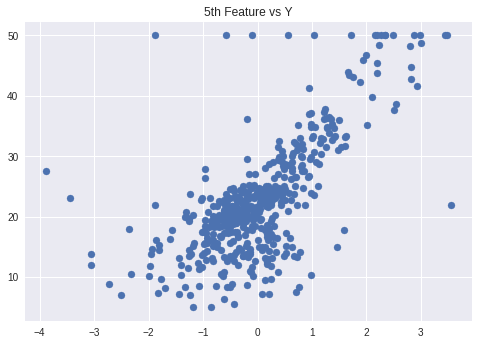

In [9]:
# Plot Y vs any feature
plt.style.use('seaborn')
plt.scatter(X[:,5],Y)
plt.title('5th Feature vs Y')
plt.show()

## Making Data Ready for Algorithm

In [10]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape) #Adding a Dummy Feature

(506, 14)


## Gradient Descent Algorithm

In [0]:
# Helper Functions
def hypothesis(x,theta):
  y_=0.0
  n=x.shape[0]
  for i in range(n):
    y_+=(theta[i]*(x[i]))
  return y_
def error(X,y,theta):
  e=0.0
  m=X.shape[0]
  for i in range(m):
    y_=hypothesis(X[i],theta)
    e+=(y[i]-y_)**2 
  return e/m 
def gradient(X,y,theta):
  m,n=X.shape 
  grad=np.zeros((n,))
  # for all values of j 
  for j in range(n):
    #sum over all examples
    for i in range(m):
      y_=hypothesis(X[i],theta)
      grad[j]+=(y_-y[i])*X[i][j]
  return grad/m 

In [0]:
def gradient_descent(X,y,learning_rate=0.1,max_epochs=350):
  m,n=X.shape 
  theta=np.zeros((n,))
  error_list=[]
  for i in range(max_epochs):
    e=error(X,y,theta)
    error_list.append(e)
    #Gradient Descent 
    grad=gradient(X,y,theta)
    for j in range(n):
      theta[j]=theta[j]-learning_rate*grad[j] 
  return theta,error_list 

## Training 

In [13]:
import time
start=time.time()
theta,error_list=gradient_descent(X,Y)
end=time.time()
print("Time Taken is ",end-start)

Time Taken is  19.7716007232666


**THIS IS QUITE SLOW, AND THUS WE USE EFFICIENT WAY, CHECK IT OUT HERE-https://github.com/dipitvasdev/Predicting-Boston-House-Price/blob/master/Boston_Housing_DataSet.ipynb**

## Visualising Error Function

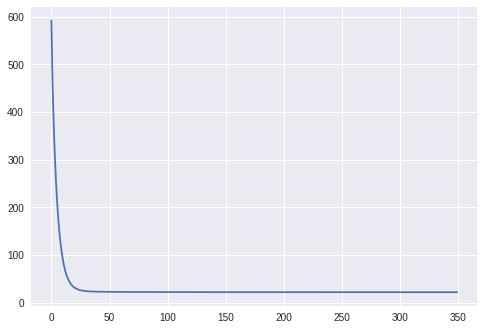

In [14]:
plt.plot(error_list)

## Predictions and R2 Score

In [0]:
y_=[]
m=X.shape[0]

for i in range(m):
  pred=hypothesis(X[i],theta)
  y_.append(pred)
y_=np.array(y_)

In [0]:
def r2score(y,y_):
  num=np.sum((y-y_)**2)
  demon=np.sum((y-y.mean())**2)
  score=(1-num/demon)
  return score*100

In [17]:
r2score(Y,y_)

74.05432229300169

## Getting Predictions.csv

In [0]:
pd.DataFrame(y_).to_csv("Predictions.csv")